In [1]:
//%jsroot on

In [2]:
const double PPAC3_Z = -84.2-188;
const double PPAC2_Z = -260.2-188;
const double PPAC1_Z = -504.2-188;

In [3]:
int start = 520;
int stop = start;
TChain *fch;
fch = new TChain("tree", "tele");
for (int i= start; i<=stop; i++){
  TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatappac/newtest13/tele%04d.root" , i);
  //TString fileName = TString::Format("/data/d1/zhuhy/telefile/tele%04d.root" , i);
  fch->AddFile(fileName.Data());}

TCanvas *c1=new TCanvas;

In [4]:
void SetTrace(TH2I *h,Double_t k,Double_t b){
        if(h==0) return;

        Int_t nbin  = h->GetNbinsX();
        Double_t zmin = h->GetXaxis()->GetXmin();
        Double_t zmax = h->GetXaxis()->GetXmax();
        for(int i=0;i<nbin;i++){
                Double_t nowz = zmin+(zmax-zmin)*i/nbin;
                Double_t nowf = nowz*k+b;
                h->Fill(nowz,nowf);
        }
}


In [5]:
   Double_t xzTrack[3] = {PPAC1_Z,PPAC2_Z,PPAC3_Z};
   Double_t yzTrack[3] = {PPAC1_Z,PPAC2_Z,PPAC3_Z};
   Double_t xTrack[3]={0,0,0};
   Double_t yTrack[3]={0,0,0};
   Double_t tx,ty;
   Double_t mean[2][3];

   Double_t xfpx[3],xfpy[3],xpCh[3][5][2];
   TBranch        *b_xfpx;   //!
   TBranch        *b_xfpy;   //!
   TBranch        *b_xpCh;   //!

        TH2I* hxz = new TH2I("hxz","Projection of X-Z",200,-750,200,200,-60,60);
        hxz->SetStats(kFALSE);
        TH2I* hyz = new TH2I("hyz","Projection of Y-Z",200,-750,200,200,-60,60);
        hyz->SetStats(kFALSE);
        TString namex[3];
        TString namey[3];
        TH1F* xoffset[3];
        TH1F* yoffset[3];
         for(Int_t ii=0;ii<3;ii++){
            namex[ii] = TString::Format("xoffset[%d]", ii);
            namey[ii] = TString::Format("yoffset[%d]", ii);
            xoffset[ii]= new TH1F(namex[ii].Data(),namex[ii].Data(), 200, -20, 20);
            yoffset[ii]= new TH1F(namey[ii].Data(),namey[ii].Data(), 200, -20, 20);
         }

In [6]:
   fch->SetBranchAddress("xfpx[3]", xfpx, &b_xfpx);
   fch->SetBranchAddress("xfpy[3]", xfpy, &b_xfpy);
   fch->SetBranchAddress("xpCh[3][5][2]", xpCh, &b_xpCh);

In [7]:
   Long64_t nentries = fch->GetEntries();
   for (Long64_t jentry=0; jentry<nentries;jentry++) {
        if(jentry%(500000)==0)cout<<jentry<<"/"<<nentries<<'\n';
        if(jentry>200000*20)break;
            fch->GetEntry(jentry);
            for(Int_t ii=0;ii<3;ii++){xTrack[ii]=0;yTrack[ii]=0;}
            for(Int_t ii=0;ii<3;ii++){
                xTrack[ii]=xpCh[ii][0][0]-xpCh[ii][1][0];
                yTrack[ii]=xpCh[ii][3][0]-xpCh[ii][2][0];   
            }
                if(xTrack[0]&&xTrack[1]&&xTrack[2]){
                    for(Int_t ii=0;ii<3;ii++){
                        if(xTrack[ii]!=0)xoffset[ii]->Fill(xTrack[ii]);
                    }
                }
                if(yTrack[0]&&yTrack[1]&&yTrack[2]){
                    for(Int_t ii=0;ii<3;ii++){
                        if(yTrack[ii]!=0)yoffset[ii]->Fill(yTrack[ii]);
                    }
                }
   }

0/97479


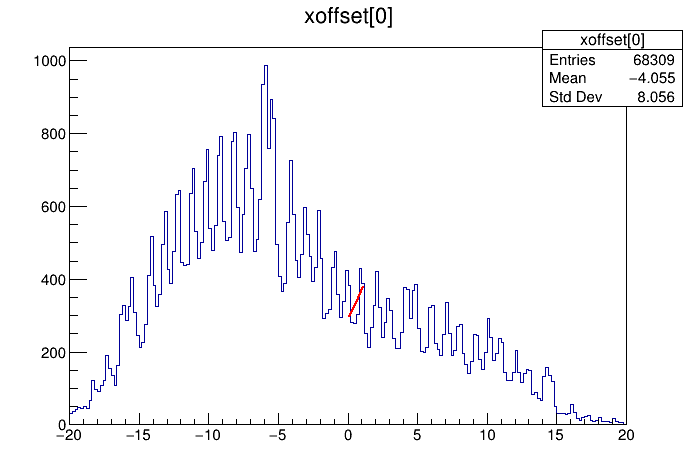

 FCN=46.8821 FROM MIGRAD    STATUS=CALL LIMIT   1350 CALLS        1351 TOTAL
                     EDM=0.000641255    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  28.5 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.65664e+04   2.00039e+04   8.47563e+01   5.58336e-06
   2  p1           3.29860e+01   1.65952e+01   8.18344e-02  -3.36468e-02
   3  p2           1.15962e+01   4.54997e+00   2.25699e-02   9.95497e-02
offset=32.986


Warning in <Fit>: Abnormal termination of minimization.


In [8]:
c1->Clear();
TF1* gx0 = new TF1("gx0", "[0]*TMath::Exp(-0.5*TMath::Power((x-[1])/[2],2))",0.1, 1.1);
gx0->SetParameter(0, 600);
gx0->SetParameter(1, 0.6);
gx0->SetParameter(2, 0.3);
xoffset[0]->Fit("gx0", "", "",0.1, 1.1);
mean[0][0]=gx0->GetParameter(1);
xoffset[0]->Draw();
c1->Draw();
cout<<"offset="<<mean[0][0]<<'\n';

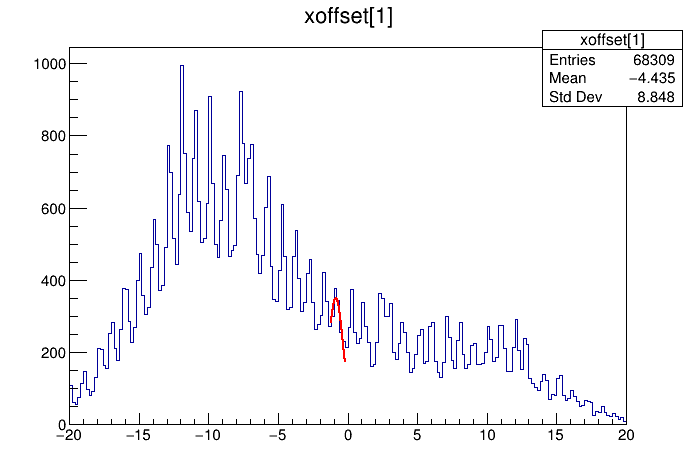

 FCN=8.46066 FROM MIGRAD    STATUS=CONVERGED     100 CALLS         101 TOTAL
                     EDM=3.15469e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.49876e+02   1.28417e+01   1.35720e-02  -5.04182e-05
   2  p1          -8.42797e-01   3.96749e-02   3.97892e-05  -1.32903e-02
   3  p2           5.44162e-01   6.55267e-02   5.15268e-05  -2.55878e-03
offset=-0.842797


In [9]:
c1->Clear();
Double_t dd=0;
TF1* gx1 = new TF1("gx1", "[0]*TMath::Exp(-0.5*TMath::Power((x-[1])/[2],2))", -1.2, -0.2);
gx1->SetParameter(0, 200);
gx1->SetParameter(1, -0.7);
gx1->SetParameter(2, 0.3);
xoffset[1]->Fit("gx1", "", "", -1.2, -0.2);
mean[0][1]=gx1->GetParameter(1);
xoffset[1]->Draw();
c1->Draw();
cout<<"offset="<<mean[0][1]<<'\n';

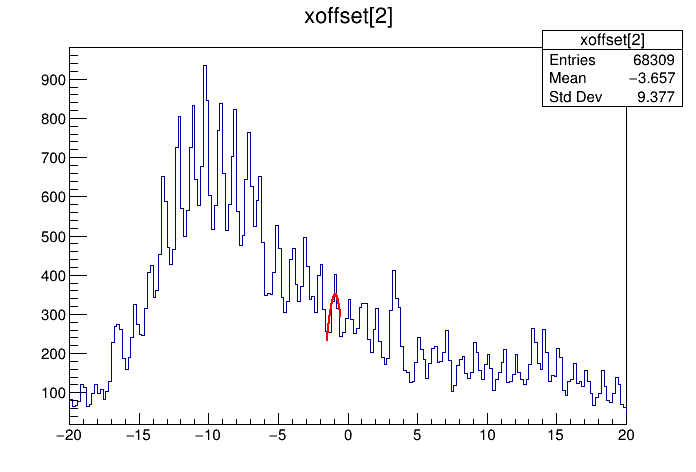

 FCN=15.5677 FROM MIGRAD    STATUS=CONVERGED     119 CALLS         120 TOTAL
                     EDM=1.27199e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.50970e+02   1.22317e+01   1.77322e-02   1.46203e-06
   2  p1          -8.98288e-01   7.26168e-02   6.98603e-05  -2.53083e-04
   3  p2           6.65104e-01   1.16799e-01   9.76462e-05   2.84346e-04
offset=-0.898288


In [10]:
c1->Clear();
Double_t ddd=1;
TF1* gx2 = new TF1("gx2", "[0]*TMath::Exp(-0.5*TMath::Power((x-[1])/[2],2))",-1.5,-0.5);//-2,-1);//0.5,1.5);
gx2->SetParameter(0, 200);
gx2->SetParameter(1, -1.);
gx2->SetParameter(2, 0.3);
xoffset[2]->Fit("gx2", "", "",-1.5,-0.5);
mean[0][2]=gx2->GetParameter(1);
xoffset[2]->Draw();
c1->Draw();
cout<<"offset="<<mean[0][2]<<'\n';

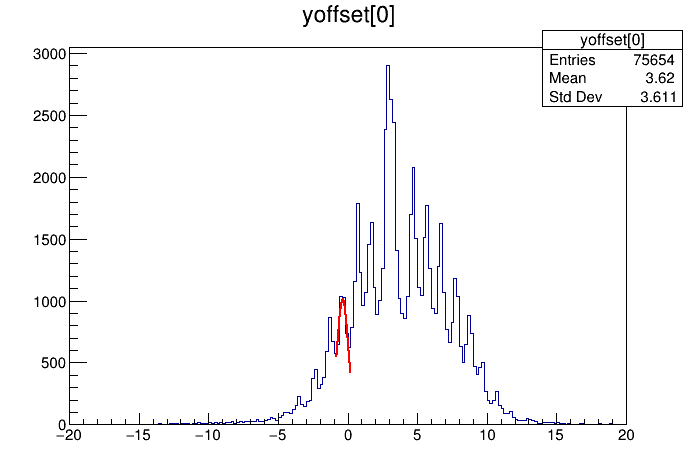

 FCN=36.0092 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=8.59133e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.00927e+03   2.34065e+01   4.71914e-02   2.37135e-05
   2  p1          -3.44679e-01   1.02737e-02   3.00337e-05   1.60552e-02
   3  p2           4.08717e-01   1.73579e-02   3.46474e-05   3.16786e-02
offset=-0.344679


In [11]:
c1->Clear();
TF1* gy0 = new TF1("gy0", "[0]*TMath::Exp(-0.5*TMath::Power((x-[1])/[2],2))", -0.8,0.2);
gy0->SetParameter(0, 250);
gy0->SetParameter(1, -0.3);
gy0->SetParameter(2, 0.3);
yoffset[0]->Fit("gy0", "", "", -0.8,0.2);
mean[1][0]=gy0->GetParameter(1);
yoffset[0]->Draw();
c1->Draw();
cout<<"offset="<<mean[1][0]<<'\n';

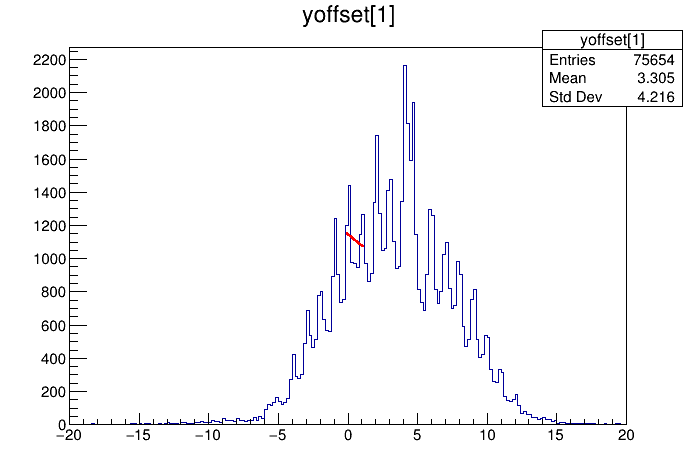

 FCN=164.95 FROM MIGRAD    STATUS=CALL LIMIT   1349 CALLS        1350 TOTAL
                     EDM=0.00045889    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  21.2 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.35793e+04   1.85497e+04   3.39583e+02  -9.37404e-06
   2  p1          -8.09792e+01   7.97637e+01  -1.65605e+00  -4.81848e-03
   3  p2           3.64185e+01   2.62644e+01   5.58152e-01  -8.63174e-03
offset=-80.9792


Warning in <Fit>: Abnormal termination of minimization.


In [12]:
c1->Clear();
TF1* gy1 = new TF1("gy1", "[0]*TMath::Exp(-0.5*TMath::Power((x-[1])/[2],2))", -0.1,1.1);
gy1->SetParameter(0, 300);
gy1->SetParameter(1, 0.5);
gy1->SetParameter(2, 0.3);
yoffset[1]->Fit("gy1", "", "",-0.1,1.1);
mean[1][1]=gy1->GetParameter(1);
yoffset[1]->Draw();
c1->Draw();
cout<<"offset="<<mean[1][1]<<'\n';

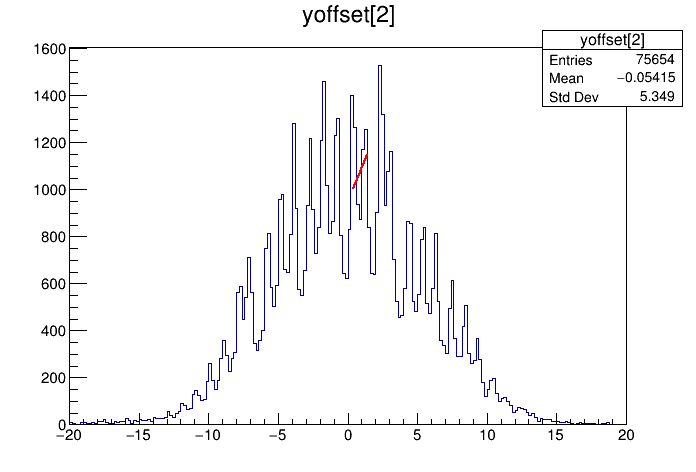

 FCN=121.447 FROM MIGRAD    STATUS=CALL LIMIT   1346 CALLS        1347 TOTAL
                     EDM=0.000621426    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  29.9 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.70621e+04   2.02790e+04   5.20684e+02  -1.17162e-04
   2  p1           4.21543e+01   2.97578e+01   9.35446e-01   2.56758e-01
   3  p2           1.75477e+01   9.51176e+00   3.01261e-01  -5.94920e-01
offset=42.1543


Warning in <Fit>: Abnormal termination of minimization.


In [13]:
c1->Clear();
TF1* gy2 = new TF1("gy2", "[0]*TMath::Exp(-0.5*TMath::Power((x-[1])/[2],2))", 0.4,1.4);
gy2->SetParameter(0, 300);
gy2->SetParameter(1, 0.9);
gy2->SetParameter(2, 0.3);
yoffset[2]->Fit("gy2", "", "",  0.4,1.4);
mean[1][2]=gy2->GetParameter(1);
yoffset[2]->Draw();
c1->Draw();
cout<<"offset="<<mean[1][2]<<'\n';

In [14]:
cout<<start<<" ";
for(Int_t ii=0;ii<3;ii++){
    for(Int_t jj=0;jj<2;jj++){
        cout<<mean[jj][ii]<<" ";
    }    
}

520 32.986 -0.344679 -0.842797 -80.9792 -0.898288 42.1543 

##### 